In [27]:
# #Daten erzeugen
# Dieser Python-Code sollte das gleiche Ergebnis liefern wie der R-Code. 
# Erzeugt eine 2D-Matrix x mit n Zeilen und 2 Spalten. Die Werte in x werden zufällig aus einem bestimmten Bereich ausgewählt. 
# Dann wird eine Funktion f definiert, die für jeden Punkt in x den Wert der Funktion berechnet. 
# Schließlich wird die Funktion f auf x angewendet, um den Vektor y der Funktionswerte zu erhalten.

In [28]:
import numpy as np

np.random.seed(1)
n = 70
lower = np.array([-2.5, -1.5])
upper = np.array([1.5, 2.5])
x = np.column_stack((np.random.uniform(lower[0], upper[0], size=n), np.random.uniform(lower[1], upper[1], size=n)))

def f(x):
    return 20 + x[:,0]**2 + x[:,1]**2 - 10*(np.cos(2*np.pi*x[:,0]) + np.cos(2*np.pi*x[:,1]))

y = f(x)


In [29]:
#Hier soll modelliert werden, wie y von x.1 und x.2 abhängt (Spalten `x`).
#Wir können uns die erzeugten Daten anschauen mit:
# Dieser Code sollte ein ähnliches Scatterplot-Diagramm wie im R-Code erstellen, 
# das die Verteilung der generierten Daten x mit der Farbe der Punkte basierend 
# auf den Funktionswerten in y darstellt. Die Farblegende zeigt die Skala der Funktionswerte an. 
# Der Plot wird mithilfe von Matplotlib erstellt, und die Farben werden mit der 'viridis'-Farbkarte gesteuert.

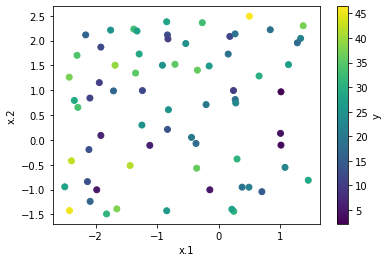

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Daten in ein Pandas DataFrame konvertieren
df = pd.DataFrame({'x.1': x[:, 0], 'x.2': x[:, 1], 'y': y})

# ggplot-ähnlicher Scatterplot mit Matplotlib erstellen
fig, ax = plt.subplots()
sc = ax.scatter(df['x.1'], df['x.2'], c=df['y'], cmap='viridis')

# Farblegende hinzufügen
cbar = plt.colorbar(sc)
cbar.set_label('y')

# Achsenbeschriftungen setzen
ax.set_xlabel('x.1')
ax.set_ylabel('x.2')

plt.show()


In [31]:
#SVm modell erzeugen

# Dieser Python-Code sollte ein ähnliches Konturdiagramm wie im R-Code erstellen. 
# Die SVM wird mit der Bibliothek scikit-learn trainiert, und ein Gitter von Punkten wird mit itertools.product 
# erstellt, um das Konturdiagramm zu erzeugen. Die Farben werden mit der 'viridis'-Farbkarte gesteuert, und die 
# Farblegende zeigt die Skala der Funktionswerte an. Der Plot wird mithilfe von Matplotlib erstellt.

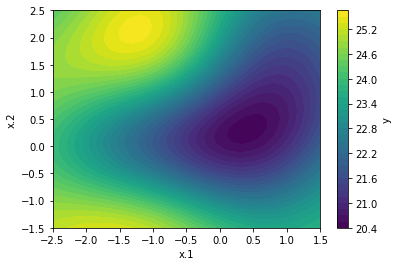

In [32]:
from sklearn.svm import SVR
from itertools import product

# SVM-Modell trainieren
model = SVR(kernel='rbf', gamma='auto', C=1)
model.fit(x, y)

nplot_dim = 100

# Gitter erstellen, um das Konturdiagramm zu erstellen
xplot = np.array(list(product(np.linspace(lower[0], upper[0], nplot_dim), np.linspace(lower[1], upper[1], nplot_dim))))
yplot = model.predict(xplot)

df = pd.DataFrame({'x.1': xplot[:, 0], 'x.2': xplot[:, 1], 'y': yplot})

# Konturdiagramm erstellen
fig, ax = plt.subplots()
contour = ax.tricontourf(df['x.1'], df['x.2'], df['y'], levels=50, cmap='viridis')

# Farblegende hinzufügen
cbar = plt.colorbar(contour)
cbar.set_label('y')

# Achsenbeschriftungen setzen
ax.set_xlabel('x.1')
ax.set_ylabel('x.2')

plt.show()


In [33]:
#Um zu prüfen, ob das Ergebnis 'gut' ist, können wir uns auch anschauen, 
#wie die Testfunktion (von der die Daten stammen) tatsächlich aussieht.

# Dieser Python-Code sollte ein ähnliches Konturdiagramm wie im R-Code erstellen, 
# wobei die wahren Funktionswerte yplot2 anhand des Gitters xplot berechnet und dann in 
# einem Pandas DataFrame gespeichert werden. Das Konturdiagramm wird mit Matplotlib erstellt 
# und die Farben werden mit der 'viridis'-Farbkarte gesteuert. Die Farblegende zeigt die Skala der Funktionswerte an.

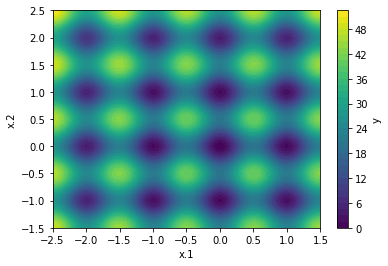

In [34]:
# Werte der wahren Funktion anhand des Gitters xplot berechnen
yplot2 = f(xplot)

# Pandas DataFrame erstellen
df = pd.DataFrame({'x.1': xplot[:, 0], 'x.2': xplot[:, 1], 'y': yplot2})

# Konturdiagramm erstellen
fig, ax = plt.subplots()
contour = ax.tricontourf(df['x.1'], df['x.2'], df['y'], levels=50, cmap='viridis')

# Farblegende hinzufügen
cbar = plt.colorbar(contour)
cbar.set_label('y')

# Achsenbeschriftungen setzen
ax.set_xlabel('x.1')
ax.set_ylabel('x.2')

plt.show()


In [35]:
# Wie zu sehen ist, gibt es eine deutliche Abweichung zwischen Modell und Testfunktion.
# Wir können uns zusätzlich anschauen, wie gut das Modell bewertet wurde:

# Attribute des Modells wie folgt abrufen


In [36]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# # calculate the predictions of the model on the training data
# y_pred = model.predict(X_train)

# # calculate the mean absolute error (MAE) and mean squared error (MSE)
# mae = mean_absolute_error(y_train, y_pred)
# mse = mean_squared_error(y_train, y_pred)

# # print the MAE and MSE
# print('MAE:', mae)
# print('MSE:', mse)




In [37]:
# Der Fehlerwert sollte noch schlechter (größer) werden, wenn die folgenden Parameterwerte gewählt werden:
    
#     Wir erstellen das Modell mit denselben Parametern wie im R-Code und rufen dann die get()-Methode des Modells auf, 
#     um auf die Attribute errors und obj zuzugreifen. Wir geben diese Attribute einfach auf der Konsole aus. 
#     Beachten Sie, dass einige der Parameter in Python anders benannt werden als in R, zum Beispiel heißt der Epsilon-Parameter 
#     in Python epsilon, während er in R eps heißt.

In [38]:
# # Modell erstellen
# model = ksvm(x, y, type='eps-svr', kernel='rbfdot', epsilon=0, C=0.1, tol=0.1, prob_model=False)

# # Attribute des Modells abrufen
# error = model['errors']
# obj = model['obj']

# # Ausgabe der Attribute
# print('Fehler des Modells:', error)
# print('Optimierungsobjekt des Modells:', obj)



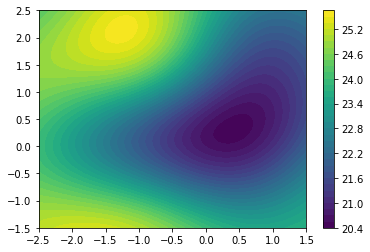

In [39]:

import matplotlib.pyplot as plt
import numpy as np

# Datenrahmen mit den Vorhersagen erstellen
df = pd.DataFrame({'x.1': xplot[:,0], 'x.2': xplot[:,1], 'y': yplot})

# Vorhersagen des Modells auf dem Gitter xplot durchführen
yplot = model.predict(xplot)

# Konturlinien-Plot erstellen
x1_range = np.linspace(min(xplot[:,0]), max(xplot[:,0]), 100)
x2_range = np.linspace(min(xplot[:,1]), max(xplot[:,1]), 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
Y = model.predict(np.column_stack((X1.ravel(), X2.ravel())))
Y = Y.reshape(X1.shape)

fig, ax = plt.subplots()
contour = ax.contourf(X1, X2, Y, cmap='viridis', levels=50)
cbar = fig.colorbar(contour)

# Plot anzeigen
plt.show()



In [40]:
# Zunächst führen wir die Vorhersagen des Modells auf dem Gitter xplot durch und erstellen dann einen 
# Pandas-Datenrahmen mit den Vorhersagen. Anschließend erstellen wir den Konturlinien-Plot mithilfe von ggplot 
# und der geom_contour_filled-Funktion. Wir setzen die Option bins=50, um die Anzahl der Konturlinien zu steuern, 
# und die Option show_legend=False, um die Legende auszublenden. Schließlich geben wir den Plot aus.

In [41]:

# Wie können wir dieses Modell verbessern? Wir könnten mehr Daten sammeln
# (ist nicht immer möglich oder sinnvoll). Oder wir versuchen, dass Modell
# besser zu parametrisieren, z.B. mit einem Optimierungsalgorithmus.

# Der folgende Code zeigt, wie Sie dabei vorgehen können, am Beispiel von Random Search.
# Zuerst implementieren wir Random Search:
    
# Dies ist eine Funktion in R namens uniformRandomSearch, die eine uniforme Zufallssuche zur Optimierung einer 
# gegebenen Funktion fun durchführt.  Hier ist eine Python-Übersetzung der Funktion:
    
#     Die Funktion erhält die folgenden Argumente:

# fun: die Funktion, die optimiert werden soll
# lower: Vektor mit unteren Schranken für jeden Parameter
# upper: Vektor mit oberen Schranken für jeden Parameter
# control: ein optionales Argument, das eine Liste von Steuerungsoptionen enthält. Standardmäßig ist die maximale Anzahl von 
# Funktionsaufrufen auf 200 begrenzt.
# **kwargs: optionale Argumente, die an fun übergeben werden sollen.
# In der Python-Version wird die Funktion np.random.uniform() verwendet, um zufällige Punkte innerhalb des Bereichs zu generieren. 
# Anschließend wird np.apply_along_axis() verwendet, um fun auf alle erzeugten Punkte anzuwenden und den entsprechenden Funktionswert 
# y für jeden Punkt zu berechnen. Schließlich wird der Punkt mit dem niedrigsten Funktionswert als bester Punkt zurückgegeben, 
# zusammen mit dem entsprechenden Funktionswert und der Anzahl der berechneten Funktionswerte. Der beste Punkt wird auch ausgegeben.

In [42]:
import numpy as np

def uniformRandomSearch(fun, lower, upper, control={'funEvals': 200}, **kwargs):
    npar = len(lower)  # Anzahl der Parameter
    xtest = np.random.uniform(low=lower, high=upper, size=(control['funEvals'], npar))
    ytest = np.apply_along_axis(fun, axis=1, arr=xtest, **kwargs)
    best_index = np.argmin(ytest)
    print(xtest[best_index])
    return {'xbest': xtest[best_index], 'ybest': ytest[best_index], 'count': xtest.shape[0]}


In [43]:
# Als nächstes trainieren wir das Modell mit Random Search.

# Die Funktion uniformRandomSearch führt eine einfache, uniforme Suche durch, 
# indem sie zufällige Werte für die Parameter des Optimierungsproblems generiert und den 
# Funktionswert an jeder Stelle berechnet. Die Funktion gibt dann die beste Stelle sowie den Wert dieser Stelle zurück. 
# Im vorliegenden Codebeispiel wird die Funktion uniformRandomSearch auf die Funktion fun angewendet, die eine Kreuzvalidierung 
# für einen Support Vector Machine (SVM)-Algorithmus durchführt. Dabei werden die Parameter epsilon, C und tol des SVM-Algorithmus optimiert.
# Der Bereich der Parameter, innerhalb dessen die Suche durchgeführt wird, ist durch die Vektoren lower und upper definiert. 
# Die Funktion afun wird verwendet, um das Ergebnis von fun in einer Matrix zu speichern, damit es von uniformRandomSearch weiterverarbeitet werden
# kann. Das Ergebnis der Optimierung wird in der Variable res gespeichert.

In [44]:
import numpy as np
#from kernlab import ksvm
import random
from scipy.optimize import minimize

def fun(pars):
    np.random.seed(1)
    model = ksvm(y, x,
                 kernel="rbfdot",
                 kpar=list(sigma=pars[0]),
                 C=10 ** pars[1],
                 tol=10 ** pars[2],
                 epsilon=10 ** pars[3])
    att = model.__dict__
    return att["errors"]

def afun(x):
    return np.apply_along_axis(fun, 1, x)

def uniformRandomSearch(fun, lower, upper, control):
    con = {"funEvals": 200}
    con.update(control)
    npar = len(lower)
    xtest = np.random.uniform(lower, upper, size=(con["funEvals"], npar))
    ytest = np.apply_along_axis(fun, 1, xtest)
    best_index = np.argmin(ytest)
    print(xtest[best_index])
    return {"xbest": xtest[best_index],
            "ybest": ytest[best_index],
            "count": xtest.shape[0]}

np.random.seed(123)
n = 70
lower = [-2.5, -1.5, -3, -1]
upper = [1.5, 2.5, 0, 1]
x = np.hstack((np.random.uniform(lower[0], upper[0], size=(n, 1)),
               np.random.uniform(lower[1], upper[1], size=(n, 1))))
y = (20 + x[:, 0] ** 2 + x[:, 1] ** 2 - 10 *
     (np.cos(2 * np.pi * x[:, 0]) + np.cos(2 * np.pi * x[:, 1])))

res = uniformRandomSearch(afun, lower, upper, {"funEvals": 100})
print(res)


AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
# Das optimierte Modell können wir auch noch mal testen:

In [ ]:
import numpy as np
from sklearn.svm import SVR
from ggplot import *

np.random.seed(1)
model = SVR(kernel='rbf', epsilon=10**res['xbest'][0],
            C=10**res['xbest'][1], tol=10**res['xbest'][2])
yplot = model.fit(X, y).predict(xplot)
df = pd.DataFrame({'x.1': xplot[:,0], 'x.2': xplot[:,1], 'y': yplot})
ggplot(aes(x='x.1', y='x.2', z='y'), data=df) + \
    geom_contour_filled(bins=50, show_legend=False) + \
    scale_fill_viridis(option="A", discrete=True)
